#Purpose
The main purpose of this notebook is to create a bank churn predictor using a neural network. The dataset we are using is heavly skewed and therefore multiple methods to handle them will be tested and the best model will be saved

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("./Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5988,5989,15809227,Chukwudi,850,France,Male,35,2,0.00,2,1,1,56991.66,0
3116,3117,15666675,Hsieh,753,France,Female,39,7,155062.80,1,1,1,16460.77,0
2413,2414,15604073,Bibi,815,Germany,Female,25,8,135161.67,1,1,1,136071.05,0
6064,6065,15680399,Tung,772,France,Male,23,2,0.00,2,1,0,18364.19,0
4998,4999,15792916,Ositadimma,559,Spain,Female,40,7,144470.77,1,1,1,18917.95,0


#Pre Processing

In [ ]:
# drop RowNumber	CustomerId	Surname
df1 = df.drop(['RowNumber',	'CustomerId',	'Surname'], axis=1)
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2740,650,Germany,Male,34,4,142393.11,1,1,1,11276.48,0
6804,692,France,Female,30,7,0.00,2,1,1,18826.34,0
8141,486,Spain,Male,24,1,0.00,1,1,0,98802.76,0
1522,787,France,Female,35,1,106266.80,1,1,1,16607.15,0
7574,749,France,Female,33,1,74385.98,1,1,0,20164.47,0


In [ ]:
df1.shape

(10000, 11)

In [ ]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df1.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# mapping the geographies and gender categorical values to numerical
df2 = df1.copy()

df2.replace({'France':0, 'Spain':1, 'Germany':2}, inplace=True)
df2.replace({'Female':0, 'Male':1}, inplace=True)


In [ ]:
df2.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#Visualizing data

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


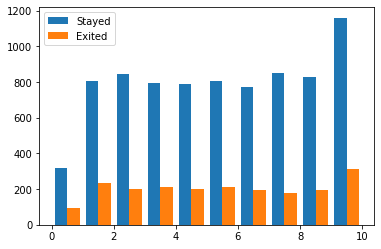

In [ ]:
plt.hist([df2[df2['Exited']==0].Tenure, df2[df2['Exited']==1].Tenure], label=['Stayed', 'Exited'])
plt.legend()
plt.show()

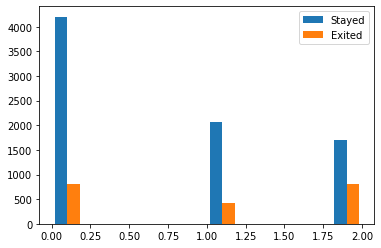

In [ ]:
plt.hist([df2[df2['Exited']==0].Geography, df2[df2['Exited']==1].Geography], label=['Stayed', 'Exited'])
plt.legend()
plt.show()

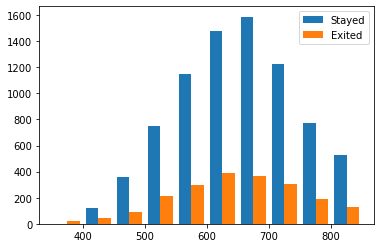

In [ ]:
plt.hist([df2[df2['Exited']==0].CreditScore, df2[df2['Exited']==1].CreditScore], label=['Stayed', 'Exited'])
plt.legend()
plt.show()

In [ ]:
# standardizing CreditScore, Age, Tenure, Balance, EstimatedSalary
from sklearn.preprocessing import MinMaxScaler

df3 = df2.copy()
s = MinMaxScaler()
s.fit(df3[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])
df3[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = s.transform(df3[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]) 

df3.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.749500,0.545700,0.282727,0.501280,0.304848,1.530200,0.70550,0.515100,0.500441,0.203700
std,0.193307,0.830433,0.497932,0.141727,0.289217,0.248696,0.581654,0.45584,0.499797,0.287580,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.000000,0.189189,0.300000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000
50%,0.604000,0.000000,1.000000,0.256757,0.500000,0.387402,1.000000,1.00000,1.000000,0.500960,0.000000
75%,0.736000,2.000000,1.000000,0.351351,0.700000,0.508749,2.000000,1.00000,1.000000,0.746955,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
df3.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Train and Test Split

In [ ]:
x = df3.drop(['Exited'],axis=1)
y = df3['Exited']
print(x.shape)
print(y.shape)

(10000, 10)
(10000,)


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(7500, 10) (7500,)
(2500, 10) (2500,)


# Model 1: without fixing the imbalanced dataset

In [ ]:
# imports 
import tensorflow.keras as keras

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(10,)),
    keras.layers.Dense(1, activation="sigmoid")
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
235/235 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7168
Epoch 2/5
235/235 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.8005
Epoch 3/5
235/235 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8057
Epoch 4/5
235/235 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8108
Epoch 5/5
235/235 [==============================] - 1s 2ms/step - loss: 0.4322 - accuracy: 0.8164


#Evaluation

In [ ]:
model1.evaluate(xtest, ytest)

79/79 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8144


[0.44013622403144836, 0.8144000172615051]

#Report

In [ ]:
ps = model1.predict(xtest)
ps = [[round(i[0])] for i in ps]

79/79 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ps))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1991
           1       0.68      0.17      0.27       509

    accuracy                           0.81      2500
   macro avg       0.75      0.57      0.58      2500
weighted avg       0.79      0.81      0.77      2500



# Method 1 - Downsizing

In [ ]:
df3.Exited.value_counts()

exited_0 = df3[df3.Exited==0]
exited_1 = df3[df3.Exited==1]
print(len(exited_0))
print(len(exited_1))

7963
2037


In [ ]:
exited_0_down = exited_0.sample(len(exited_1))
len(exited_0_down)

2037

In [ ]:
# concat 
df4 = pd.concat([exited_0_down, exited_1], axis=0)
df4.Exited.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

In [ ]:
x = df4.drop(['Exited'], axis=1)
y = df4.Exited
# train and test splits
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y)
# model
model2 = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(10,)),
    keras.layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
96/96 [==============================] - 1s 3ms/step - loss: 0.7129 - accuracy: 0.5358
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6190
Epoch 3/5
96/96 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6239
Epoch 4/5
96/96 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6432
Epoch 5/5
96/96 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.6599


In [ ]:
# evaluate
model2.evaluate(xtest, ytest)

32/32 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.6644


[0.6134096384048462, 0.6643768548965454]

In [ ]:
ps = model2.predict(xtest)
ps = [[round(i[0])] for i in ps]
print(classification_report(ytest, ps))

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       509
           1       0.67      0.65      0.66       510

    accuracy                           0.66      1019
   macro avg       0.66      0.66      0.66      1019
weighted avg       0.66      0.66      0.66      1019



Although the the f1 score decreased, it is similar for both class therefore our model can now partially recognize each class

#Method 2 - Oversampling using duplicates

In [ ]:
# exited_0
exited_1_over = exited_1.sample(len(exited_0), replace=True)
len(exited_1_over)

7963

In [ ]:
# concat 
df5 = pd.concat([exited_0, exited_1_over], axis=0)
df5.Exited.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [ ]:
x = df5.drop(['Exited'], axis=1)
y = df5.Exited
# train and test splits
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y)
# model
model3 = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(10,)),
    keras.layers.Dense(1, activation="sigmoid")
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
374/374 [==============================] - 1s 2ms/step - loss: 0.6610 - accuracy: 0.6076
Epoch 2/5
374/374 [==============================] - 1s 2ms/step - loss: 0.6113 - accuracy: 0.6786
Epoch 3/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5827 - accuracy: 0.6990
Epoch 4/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5620 - accuracy: 0.7158
Epoch 5/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7267


In [ ]:
# evaluate
model3.evaluate(xtest, ytest)

125/125 [==============================] - 1s 3ms/step - loss: 0.5414 - accuracy: 0.7275


[0.541410505771637, 0.7275238633155823]

In [ ]:
ps = model3.predict(xtest)
ps = [[round(i[0])] for i in ps]
print(classification_report(ytest, ps))

125/125 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1991
           1       0.75      0.74      0.74      1991

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted avg       0.75      0.75      0.75      3982



#Method3 - SMOTE

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
# df3.Exited.value_counts()
x = df3.drop(['Exited'], axis=1)
y = df3.Exited

smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x, y)

y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
# train and test splits
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y)
# model
model4 = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(10,)),
    keras.layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
374/374 [==============================] - 1s 2ms/step - loss: 0.6440 - accuracy: 0.6319
Epoch 2/5
374/374 [==============================] - 1s 2ms/step - loss: 0.6033 - accuracy: 0.6767
Epoch 3/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5804 - accuracy: 0.6957
Epoch 4/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5643 - accuracy: 0.7093
Epoch 5/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5516 - accuracy: 0.7226


In [ ]:
# evaluate
model4.evaluate(xtest, ytest)

125/125 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 0.7152


[0.5558269023895264, 0.7152184844017029]

In [ ]:
ps = model4.predict(xtest)
ps = [[round(i[0])] for i in ps]
print(classification_report(ytest, ps))

125/125 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1991
           1       0.72      0.70      0.71      1991

    accuracy                           0.72      3982
   macro avg       0.72      0.72      0.72      3982
weighted avg       0.72      0.72      0.72      3982

